This project is about determine if a review is positive or negative.
The data that I Will work with is about Amazon Fine Food Review Analysis and this data span a period of 10 years and it's include 
~500,000 reviews up to October 2012.
For the analyses I will considere Score/Rating. 
where A rating of  review of 1 or 2 is considered negative,A rating of review of 4 or 5 could be cosnidered a positive review. A A review of 3 is nuetral and ignored

In [198]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [199]:
data=pd.read_csv("C:\\Users\\marce\\OneDrive\\Ambiente de Trabalho\\DataScience\\NLP\\Reviews_original.csv")

In [200]:
data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [201]:
data.shape

(568454, 10)

In [202]:
# as we can see, we our data is really huge. 
# First of all, i will filtere just positive and negative revieews. that's mean the i will not considere those reviews with Score=3

In [203]:
data_filter= data[data["Score"].isin([1,2,4,5])]

In [204]:
print("Number of data points in our data filter is:", data_filter.shape)

Number of data points in our data filter is: (525814, 10)


In [206]:
data_filter.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [207]:
# I will considere all reviews with score <3 negative and score> 3 positive 
# for that I will create a function called porsion 

def porsion(x):
    if x < 3:
        return 0 # negative
    return 1

In [208]:

#changing reviews with score less than 3 to be positive and vice-versa
actualScore = data_filter['Score']
positiveNegative = actualScore.map(porsion) 
data_filter['Score'] = positiveNegative

data_filter.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


# Exploratory Data Analysis


In [209]:
print (data_filter.duplicated(subset=['ProductId']))
print (data_filter.duplicated(subset=['UserId']))
print (data_filter.duplicated(subset=['Time']))
print (data_filter.duplicated(subset=['Text']))


0         False
1         False
2         False
3         False
4         False
          ...  
568449     True
568450    False
568451    False
568452     True
568453    False
Length: 525814, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450     True
568451    False
568452     True
568453    False
Length: 525814, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
568449     True
568450     True
568451     True
568452     True
568453     True
Length: 525814, dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 525814, dtype: bool


# 1. duplicate 

In [210]:
subset = {"UserId", "ProfileName", "Time", "Text"}
data = data_filter.drop_duplicates(subset=subset, keep="first")
print(data.shape)
data.head(3)

(364173, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


Now I will work in the variable HelpfulnessNumerator which indicates a number of user who found the review helpful
and HelpfulnessDenominator  which indicates a number of users who found the review helpful or not
the idea is to see if % of HelpfulnessNumerator is less or grater than HelpfulnessDenominator to get us an idea about the distribuition
of reviews acepation 

In [211]:
data[data['HelpfulnessNumerator'] <data['HelpfulnessDenominator']]


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,1,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,1,1262044800,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,0,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,1,1331856000,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,1,1288310400,THIS IS MY TASTE...,"This offer is a great price and a great taste,..."
...,...,...,...,...,...,...,...,...,...,...
568384,568385,B000H28ABW,A8T6W1M15FM75,"CA-SK ""CLA""",0,3,0,1255219200,Bland Taco Seasoning,"Tasteless, bland, insipid - how many synonyms ..."
568405,568406,B000P56I7Y,A2ZKNGL20FBK2I,Shatzi Crabtree,3,5,1,1274918400,Arrived Fine,The product arrived pretty quickly and was eas...
568417,568418,B0000D16IP,A1SOL9F0I9D3A4,William M. Jacobs,2,4,1,1257897600,Great,This is the best brand of Mango Chutney that I...
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,0,1285718400,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu..."


In [212]:
#"HelpfulnessNumerator" can't be grater than "HelpfulnessDenominator"
#so taking dataframe inwhich "HelpfulnessNumerator" less than or equal to "HelpfulnessDenominator"

data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.reset_index(drop = True, inplace=True)
print(data.shape)
data.head(5)

(364171, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [213]:
data[data['HelpfulnessNumerator'] >data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


# 2. Missing data

In [214]:
# see 
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    1
Text                       0
dtype: int64

In [215]:
# AS we can see we have 16 missing value in ProfiName variable and 25 missing value in Summary variable and after 
# eliminate duplicate we steal have missing data, but now less. 11 for ProfiName and 1 for Summary

In [216]:
# now i will fill out the missing value using the median 
data['ProfileName'] = data['ProfileName'].fillna(data['ProfileName'].mode())
data['Summary'] = data['Summary'].fillna(data['Summary'].mode())

In [217]:
data.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    1
Text                       0
dtype: int64

1    307061
0     57110
Name: Score, dtype: int64
******************************


Text(0.5, 1.0, 'Score distribution')

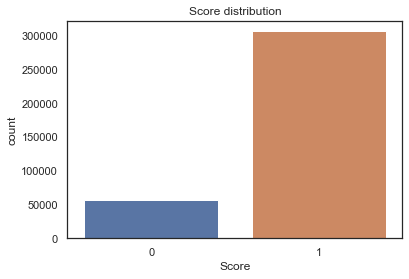

In [218]:
# after using the mode, we can see no missing value, so now let's me check the data point for each class to see the balance of my data
#data points for each class
print(data['Score'].value_counts())
print("*"*30)

#Count plot for Score
sns.countplot('Score',data = data)
plt.title("Score distribution")

In [185]:
#Checking to see how much % of data still remains
(data['Id'].size)/(data_filter['Id'].size)*100

69.25852107399194

# Text Preprocessing:

In [223]:
#set of stopwords
import re
import nltk
from nltk.corpus import stopwords

# 1. Stemming

In [228]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [231]:
stop = set(stopwords.words('english'))
#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')

# 2. stop-word removal and  Lemmatization

In [233]:

#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

In [234]:
data['CleanedText'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()

(364171, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted peanuts a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great wide assortment yummy Delive...


# Converting Text data into vector

In [237]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)

    print("the type of count vectorizer ",type(final_array))
    print("the shape of out text BOW vectorizer ",final_array.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_array.get_shape()[1])
    
    return model_vect, final_array

# Spliting data


In [239]:
split data into train, cross validate and test 
from sklearn.model_selection import train_test_split

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train

SyntaxError: invalid syntax (<ipython-input-239-aec7a67a0896>, line 1)

# Normalize Data


In [238]:
#Normalize Data
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)

    print("Train Data Size ",train.get_shape())
    print("CV Data Size: ",cv.shape)
    print("Test Data Size: ",test.shape)
    
    return train, cv, test

# Training Multinomial Naive Bayes Model
